<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_matrix_vector(matrices, vectors):
    result = np.zeros_like(vectors[0])
    for i in range(len(matrices)):
        result += np.dot(matrices[i], vectors[i])

    return result

def test_sum_matrix_vector():
    matrix1 = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
    vector1 = np.array([[1],[2],[3]])
    matrix2 = np.array([[2, 1, 0],[1, 2, 1],[0, 1, 2]])
    vector2 = np.array([[4],[5],[6]])

    result1 = np.dot(matrix1, vector1)
    result2 = np.dot(matrix2, vector2)
    expected_result1 = result1 + result2

    matrices1 = [matrix1, matrix2]
    vectors1 = [vector1, vector2]
    computed_result1 = sum_matrix_vector(matrices1, vectors1)

    assert np.array_equal(computed_result1, expected_result1)

    matrix3 = np.array([[9, 8, 7],[6, 5, 4],[3, 2, 1]])
    vector3 = np.array([[7],[8],[9]])
    matrix4 = np.array([[5, 4, 2],[1, 8, 9],[0, 3, 4]])
    vector4 = np.array([[5],[4],[3]])

    result3 = np.dot(matrix3, vector3)
    result4 = np.dot(matrix4, vector4)
    expected_result2 = result3 + result4

    matrices2 = [matrix3, matrix4]
    vectors2 = [vector3, vector4]
    computed_result2 = sum_matrix_vector(matrices2, vectors2)

    assert np.array_equal(computed_result2, expected_result2)

test_sum_matrix_vector()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M, threshold=0.5):
    binary_m = np.where(M > threshold, 1, 0)
    return binary_m

def test_binarize():
    assert np.array_equal(binarize(np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]]), 0.5), 
                          np.array([[0, 0, 0], [0, 0, 1],[1, 1, 1]]))
    assert np.array_equal(binarize(np.array([[0.1, 0.7, 0.3], [0.9, 0.5, 0.2], [0.4, 0.8, 0.6]]), 0.5), 
                          np.array([[0, 1, 0], [1, 0, 0],[0, 1, 1]]))

test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(column) for column in mat.T]

def test_unique_rows():
    assert (np.array_equal(res, exp) for res, exp in zip
            (unique_rows(np.array([[1, 2, 3, 1], [4, 5, 6, 4], [1, 1, 2, 2]])), 
            [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([1, 2])]))
    
def test_unique_columns():
    assert all(np.array_equal(res, exp) for res, exp in zip
               (unique_columns(np.array([[1, 3, 2], [4, 5, 5], [1, 2, 2]])),
               [np.array([1, 4]), np.array([2, 3, 5]), np.array([2, 5])]))
    
test_unique_rows()
test_unique_columns()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

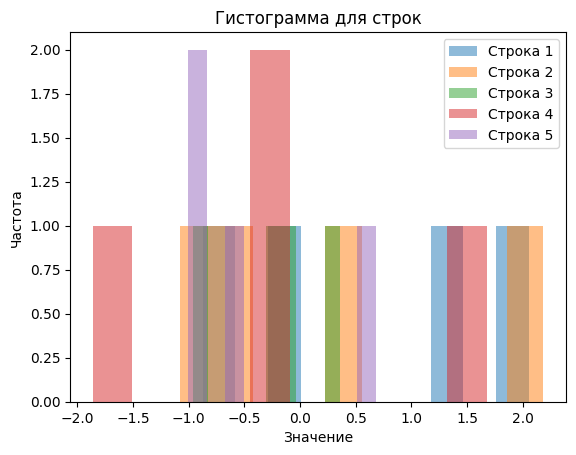

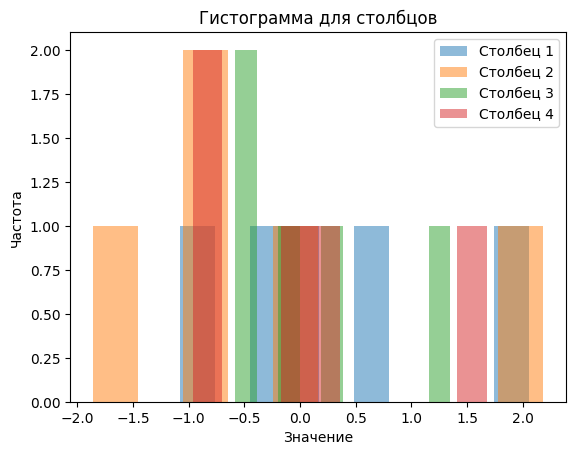

In [147]:
def fill_matrix(m, n):
    matrix = np.random.randn(m, n)
    return matrix

def calculate_mean_and_var(matrix):
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    return row_means, row_variances, col_means, col_variances

def create_hist(matrix):
    num_rows, num_cols = matrix.shape

    for i in range(num_rows):
        plt.hist(matrix[i], bins=10, alpha=0.5, label= f'Строка {i+1}')

    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.title('Гистограмма для строк')
    plt.legend()
    plt.show()

    for j in range(num_cols):
        plt.hist(matrix[:, j], bins=10, alpha=0.5, label=f'Столбец {j+1}')
    
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.title('Гистограмма для столбцов')
    plt.legend()
    plt.show()

m = 5
n = 4
matrix = fill_matrix(m, n)
row_means, row_variances, col_means, col_variances = calculate_mean_and_var(matrix)
create_hist(matrix)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    matrix = np.full((m, n), a)
    matrix[1::2, ::2] = b
    matrix[::2, 1::2] = b
    return matrix

def test_chess():
    assert np.array_equal(chess(4, 4, 0, 1), np.array([[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]))
    assert np.array_equal(chess(3, 4, 0, 1), np.array([[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]))
    assert np.array_equal(chess(2, 2, 5, 2), np.array([[5, 2], [2, 5]]))

test_chess()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [7]:
from PIL import Image

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = Image.new('RGB', (n, m), color=background_color)
    pixels = image.load()
    
    for i in range(a, a+b):
        for j in range(n):
            pixels[j, i] = rectangle_color
            
    for i in range(m):
        for j in range(a, a+b):
            pixels[j, i] = rectangle_color
    
    return np.array(image)

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = Image.new('RGB', (n, m), color=background_color)
    pixels = image.load()
    center_x = n // 2
    center_y = m // 2

    for y in range(m):
        for x in range(n):
            if ((x - center_x) / a)**2 + ((y - center_y) / b)**2 <= 1:
                pixels[x, y] = ellipse_color
                
    return np.array(image)

def test_draw_shapes():
    m = 200
    n = 300
    rectangle_color = (255, 0, 0)
    background_color = (255, 255, 255)
    image_rect = draw_rectangle(50, 80, m, n, rectangle_color, background_color)
    assert np.array_equal(image_rect[50:130, :80, :], np.full((80, 80, 3), rectangle_color))
    
    a = 80
    b = 50
    ellipse_color = (0, 255, 0)
    image_ellipse = draw_ellipse(a, b, m, n, ellipse_color, background_color)
    for y in range(m):
        for x in range(n):
            if ((x - n//2) / a)**2 + ((y - m//2) / b)**2 <= 1:
                assert np.array_equal(image_ellipse[y, x, :], ellipse_color)

test_draw_shapes()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [8]:
def get_mean(time_series):
    return np.mean(time_series)

def get_var(time_series):
    return np.var(time_series)

def get_std(time_series):
    return np.var(time_series)

def get_local_min(time_series):
    return np.where((np.diff(np.sign(np.diff(time_series))) > 0))[0] + 1

def get_local_max(time_series):
    return np.where((np.diff(np.sign(np.diff(time_series))) < 0))[0] + 1

def get_moving_average(series, p):
    mov_avg = np.convolve(series, np.ones(p), 'valid') / p
    return np.concatenate((np.full(p-1, np.nan), mov_avg))

time_series = np.array([3, 8, 4, 7, 2, 9, 5, 6, 1, 12])
p = 3

print(get_mean(time_series))
print(get_var (time_series))
print(get_std(time_series))
print(get_local_min(time_series))
print(get_local_max(time_series))
print(get_moving_average(time_series, p))



5.7
10.41
10.41
[2 4 6 8]
[1 3 5 7]
[       nan        nan 5.         6.33333333 4.33333333 6.
 5.33333333 6.66666667 4.         6.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [9]:
def one_hot_encoding(labels, classes):
    encoded_labels = np.zeros((len(labels), classes))
    encoded_labels[np.arange(len(labels)), labels] = 1
    return encoded_labels

vector = [0, 2, 3, 0]
classes = 4

print(one_hot_encoding(vector, classes))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
